In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/Cars vs Tanks'

! ls "/content/drive/MyDrive/Cars vs Tanks"

bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

In [ ]:
tanks_dir = os.path.join(bahan_dir, 'tanks/')
cars_dir = os.path.join(bahan_dir, 'cars/')

print ('Jumlah Data Train Tiap Kelas')
print ('Total gambar tank:', len(os.listdir(tanks_dir)))
print ('Total gambar mobil:', len(os.listdir(cars_dir)))

Jumlah Data Train Tiap Kelas
Total gambar tank: 100
Total gambar mobil: 100


In [ ]:
train_tanks = os.path.join(train_dir, 'tanks/')
train_cars = os.path.join(train_dir, 'cars/')

validation_tanks = os.path.join(validation_dir, 'tanks/')
validation_cars = os.path.join(validation_dir, 'cars/')

In [ ]:
import random
from shutil import copyfile

def train_val_split(source, train, val, train_ratio):
  total_size = len(os.listdir(source))
  train_size = int(total_size * train_ratio)
  val_size = total_size - train_size

  randomized = random.sample(os.listdir(source), total_size)
  train_files = randomized[0:train_size]
  val_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = source + i
    destination = train + i
    copyfile(i_file, destination)

  for i in val_files:
    i_file = source + i
    destination = val + i
    copyfile(i_file, destination)

train_ratio = 0.9

source_00 = tanks_dir
train_00 = train_tanks
val_00 = validation_tanks
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = cars_dir
train_01 = train_cars
val_01 = validation_cars
train_val_split(source_01, train_01, val_01, train_ratio)

In [ ]:
print('Jumlah All Seratus :', len(os.listdir(tanks_dir)))
print('Jumlah Train Tank  :', len(os.listdir(train_tanks)))
print('Jumlah Val Tank    :', len(os.listdir(validation_tanks)))

Jumlah All Seratus : 100
Jumlah Train Tank  : 90
Jumlah Val Tank    : 10


In [ ]:
print('Jumlah All Cars :', len(os.listdir(cars_dir)))
print('Jumlah Train Cars  :', len(os.listdir(train_cars)))
print('Jumlah Val Cars    :', len(os.listdir(validation_cars)))

Jumlah All Cars : 100
Jumlah Train Cars  : 90
Jumlah Val Cars    : 10


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    horizontal_flip=True,
    shear_range=0.3,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
               optimizer = 'Adam',
               metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=3,
    epochs=25,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step - accuracy: 0.8708 - loss: 0.2548 - val_accuracy: 0.9000 - val_loss: 0.3572
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.8750 - loss: 0.2332 - val_accuracy: 0.7000 - val_loss: 0.8884
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 482ms/step - accuracy: 0.8958 - loss: 0.2292 - val_accuracy: 0.9000 - val_loss: 0.2818
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.7708 - loss: 0.5113 - val_accuracy: 0.8000 - val_loss: 0.4921
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.8667 - loss: 0.2962 - val_accuracy: 0.7000 - val_loss: 0.5527
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.8542 - loss: 0.3144 - val_accuracy: 0.8000 - val_loss: 0.3216
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - accuracy: 0.8042 - loss: 0.4023 - val_accuracy: 0.8000 - val_loss: 0.5492
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8667 - loss: 0.2761 - val_accuracy: 0.8000 - val_loss: 0.

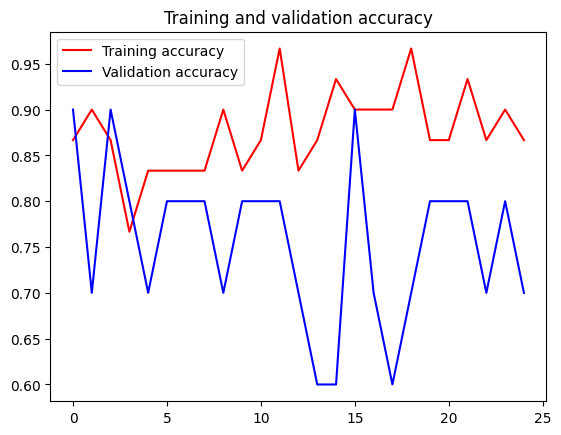

<Figure size 640x480 with 0 Axes>

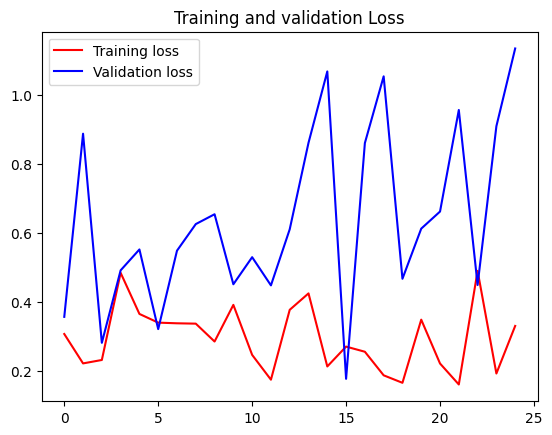

<Figure size 640x480 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range_acc = range(len(acc))
epochs_range_val_acc = range(len(val_acc))

plt.plot(epochs_range_acc, acc, 'r', label='Training accuracy')
plt.plot(epochs_range_val_acc, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='best')
plt.figure()
plt.show()

epochs_range_loss = range(len(loss))
epochs_range_val_loss = range(len(val_loss))

plt.plot(epochs_range_loss, loss, 'r', label='Training loss')
plt.plot(epochs_range_val_loss, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.legend(loc='best')
plt.figure()
plt.show()

Saving 4.jpg to 4 (2).jpg


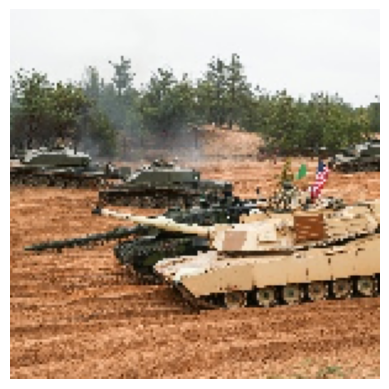

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Prediksi: This is a Tank


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

class_list = ["Car", "Tank"]

for fn in uploaded.keys():

    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0

    classes = model.predict(x)

    if classes.shape[1] == 2:
        predicted_class = np.argmax(classes, axis=1)[0]
    else:
        predicted_class = int(classes[0][0] > 0.5)

    print(f"Prediksi: This is a {class_list[predicted_class]}")